# Problem 1 - Tensors and Automatic Differentiation

In [107]:
import random

import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.optim as optim

# Set a global device to use for all PyTorch processes
if torch.backends.mps.is_available():
  DEVICE = torch.device("mps") # Apple Silicon Metal Performance Shaders
elif torch.cuda.is_available():
  DEVICE = torch.device("cuda") # GPU
else:
  DEVICE = torch.device("cpu") # CPU

## 1a) Tensors

In [66]:
# Creating a tensor from a list

a_data = [1.0, 2.0, 3.0, 4.0, 5.0]

# Note that mps does not support float64
a = torch.tensor(a_data, dtype=torch.float32)
a

tensor([1., 2., 3., 4., 5.])

In [67]:
# Creating a tensor from a numpy array

b_data = np.ones((3, 3))

b = torch.tensor(b_data, dtype=torch.float32)
b

# Could also have directly called torch.ones((3, 3,))

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [14]:
# Reshaping a tensor follows the same syntax as numpy arrays

a = a.reshape(5,1)
a

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])

In [ ]:
# Element-wise operations also follow the same syntax as numpy

# Computing the element-wise square of elements in 'a'
a ** 2

tensor([ 1.,  4.,  9., 16., 25.])

In [ ]:
# As do matrix operations

# Compute the dot product of matrix 'b' with itself
b @ b

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], dtype=torch.float64)

## 1b) Autograd

The autograd feature computes gradients of tensors automatically.

In [ ]:
def f(x):
    y= x**2 + 3*x + 1
    return y 

 Analytically, we can easily take the first derivative with respect to x. Then:

$$
\frac{dy}{dx} = 2x + 3
$$

At $x=2$, this leads to a gradient equal to $7$.

Autograd does this automatically:

In [68]:
# Create a tensor, and explicitly require the gradient to be computed
x = torch.tensor([2.0], requires_grad=True, dtype=torch.float32)

# Transform x by the function
y = f(x)

# Call this to back out the gradient
y.backward()

print("f'(x) =", x.grad.item())

f'(x) = 7.0


## 1c) Multivariate functions

In [30]:
def g(x, y):
    z = x**2 * y + y**3
    return z

Analytically, we can take first order partial derivatives:

$$
\frac{\delta z}{\delta x} = 2xy
$$

$$
\frac{\delta z}{\delta y} = x^{2} + 3y^{2}
$$

When $x=1$, $y=2$:

$$
\frac{\delta z}{\delta x} = 4
$$

$$
\frac{\delta z}{\delta y} = 13
$$

And again, PyTorch does this automatically using autograd:

In [32]:
# Create tensors
x = torch.tensor([1.0], requires_grad=True)
y = torch.tensor([2.0], requires_grad=True)

# Apply function
z = g(x,y)

# Use .backward() to compute partial derivatives
z.backward()

print("dz/dx =", x.grad.item())
print("dz/dy =", y.grad.item()) 

dz/dx = 4.0
dz/dy = 13.0


____

# Problem 2 - Linear Regression in PyTorch

## 1a) Instantiating a model

In [124]:
# PyTorch specific stochastic processes use a different seed to random.seed()
torch.manual_seed(0)

# Generate synthetic data for linear regression
n_samples = 100
true_weight = 3.5
true_bias = 1.2
X = torch.randn(n_samples, 1)
y = true_weight * X + true_bias + 0.3 * torch.randn(n_samples, 1)

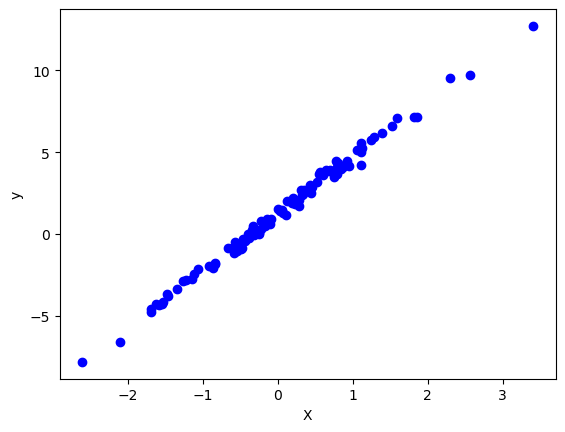

In [103]:
# A quick visualisation of the generated data
plt.scatter(X, y, color = "blue")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [115]:
# Initialise a linear model
model = nn.Linear(in_features=1, out_features=1)

# The initial parameters of the model are randomly chosen
# We have not yet shown the model any of the data
print("bias: ", model.bias.item())
print("weight: ", model.weight.item())

bias:  0.8956928253173828
weight:  0.12483882904052734


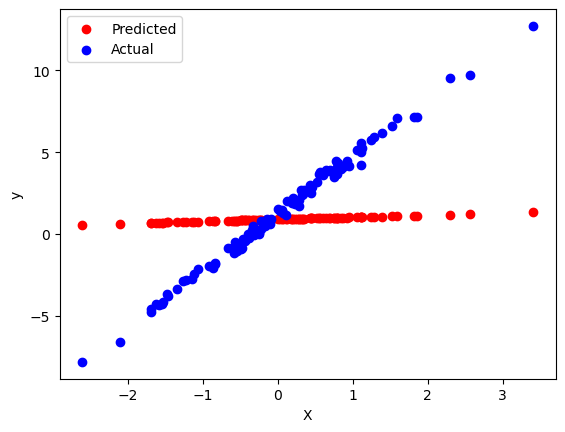

In [102]:
# Use the unfit model to make predictions
# At this point, these predictions are meaningless

# Turn off training so that gradients aren't computed
with torch.no_grad():
    y_hat_init = model(X)

plt.scatter(X, y_hat_init, color = "red", label = "Predicted")
plt.scatter(X, y, color = "blue", label = "Actual")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

As expected, the initial random parameters have no relation to the actual data.

## 1b) Fitting the model

In [116]:
# Turn training mode back on
model.train()

# Use a MSE loss function
criteria = nn.MSELoss()

# Use stochastic gradient descent with a fixed learning rate of 0.1
optimiser = optim.SGD(model.parameters(), lr=0.1)

# Train for 100 epochs
n_epochs = 100  

stored_loss = []

for epoch in range(n_epochs):

    #### Forward pass ####
    outputs = model(X)  # compute predictions
    loss = criteria(outputs, y) # compute loss

    #### Backward pass and optimisation ####
    optimiser.zero_grad()   # Clear past computed gradients
    loss.backward() # Compute gradient for this step
    optimiser.step()    # Update parameters using new gradient

    # Optionally, store the loss at each epoch for plotting
    stored_loss.append(loss.item())

    # Optionally, show the loss function every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{n_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.2414
Epoch [20/100], Loss: 0.0767
Epoch [30/100], Loss: 0.0753
Epoch [40/100], Loss: 0.0753
Epoch [50/100], Loss: 0.0753
Epoch [60/100], Loss: 0.0753
Epoch [70/100], Loss: 0.0753
Epoch [80/100], Loss: 0.0753
Epoch [90/100], Loss: 0.0753
Epoch [100/100], Loss: 0.0753


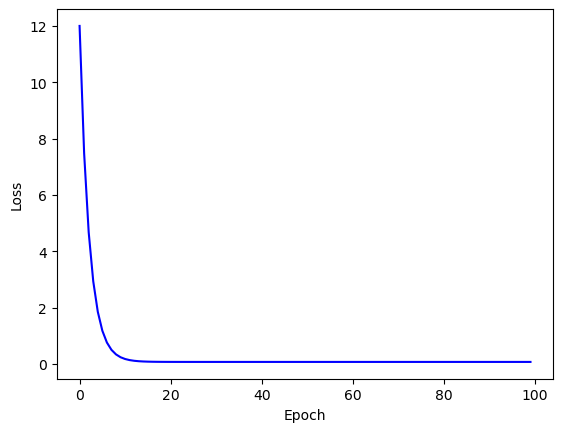

In [117]:
plt.plot(stored_loss, color = "blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

The SGD optimiser led to convergence very quickly for this simple set of data.

## 2c) Post-training

In [118]:
# Now that we have trained the model, these values
# are meaningful
print("bias: ", model.bias.item())
print("weight: ", model.weight.item())

bias:  1.2479041814804077
weight:  3.4643068313598633


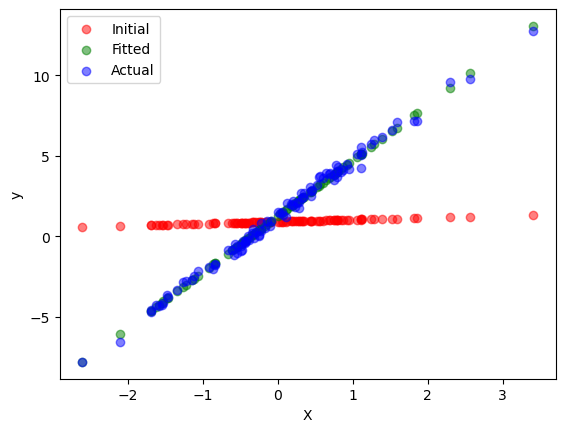

In [122]:
# Turn off training
with torch.no_grad():
    y_hat = model(X)

plt.scatter(X, y_hat_init, color = "red", label = "Initial", alpha = 0.5)
plt.scatter(X, y_hat, color = "green", label = "Fitted", alpha = 0.5)
plt.scatter(X, y, color = "blue", label = "Actual", alpha = 0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

Now we may wish to manually compute the analytical solution to this optimisation (which is only possible because this is OLS).

We need to compute:

$$
\hat{\beta}_{OLS} = (X'X)^{-1}X'y
$$

In [125]:
# Append a column of ones to the feature matrix
ones  = torch.ones(X.shape[0],1)
X1 = torch.cat([ones,X], dim = 1)

# Apply the ols formula
beta_hat = torch.linalg.solve(X1.T @ X1, X1.T @ y)

# retrieve the computed parameters in beta
beta_bias = beta_hat[0].item()
beta_weight = beta_hat[1].item()
print(f"Analytical bias: {beta_bias}")
print(f"Fitted bias: {model.bias.item()}")
print("Actual bias: 1.2\n")

print(f"Analytical weight: {beta_weight}")
print(f"Fitted weight: {model.weight.item()}")
print("Actual weight: 3.5")

Analytical bias: 1.247903823852539
Fitted bias: 1.2479041814804077
Actual bias: 1.2

Analytical weight: 3.4643077850341797
Fitted weight: 3.4643068313598633
Actual weight: 3.5


The SGD optimiser gets very close to the analytical parameters. Not sure why it doesn't manage to exactly meet the analytical solution. Perhaps a floating point error?

Finally, we can visualise the fitted model against the actual data:

In [ ]:
x_min = X.min().item()
x_max = X.max().item()
x_line = torch.tensor([[x_min],[x_max]])
y_line = model.weight.item() * x_line + model.bias.item()
plt.scatter(X.numpy(), y.numpy(), label = "Data")
plt.plot(x_line.numpy(), y_line.numpy(), color = "Black")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

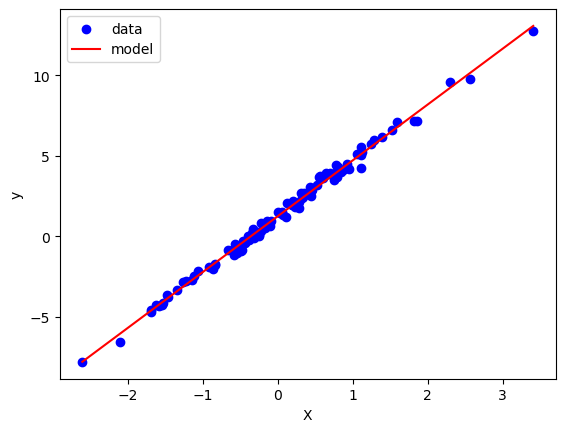

In [130]:
# Using model.eval() ensures that training behaviours are switched off
model.eval()
with torch.no_grad():
    # create a smooth range of x values
    x_line = torch.linspace(X.min(), X.max(), 200).view(-1, 1)
    # Use the model to fit y values
    y_line = model(x_line)

# Plot
plt.scatter(X, y, label="data", color = "blue")
plt.plot(x_line, y_line, label="model", color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## 2d) Adam Optimiser

We can use the same loop as before, just swapping the SGD optimiser for the Adam optimiser:

In [131]:
# Instantiate a new model
model_2 = nn.Linear(in_features=1, out_features=1)

# Turn training mode on
model_2.train()

# Use a MSE loss function
criteria = nn.MSELoss()

# Use stochastic gradient descent with a fixed learning rate of 0.1
optimiser = optim.Adam(model_2.parameters(), lr=0.1)

# Train for 100 epochs
n_epochs = 100  

stored_loss_2 = []

for epoch in range(n_epochs):

    #### Forward pass ####
    outputs = model_2(X)  # compute predictions
    loss = criteria(outputs, y) # compute loss

    #### Backward pass and optimisation ####
    optimiser.zero_grad()   # Clear past computed gradients
    loss.backward() # Compute gradient for this step
    optimiser.step()    # Update parameters using new gradient

    # Optionally, store the loss at each epoch for plotting
    stored_loss_2.append(loss.item())

    # Optionally, show the loss function every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{n_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 6.4107
Epoch [20/100], Loss: 2.5291
Epoch [30/100], Loss: 0.6869
Epoch [40/100], Loss: 0.1304
Epoch [50/100], Loss: 0.0799
Epoch [60/100], Loss: 0.0981
Epoch [70/100], Loss: 0.0896
Epoch [80/100], Loss: 0.0782
Epoch [90/100], Loss: 0.0753
Epoch [100/100], Loss: 0.0755


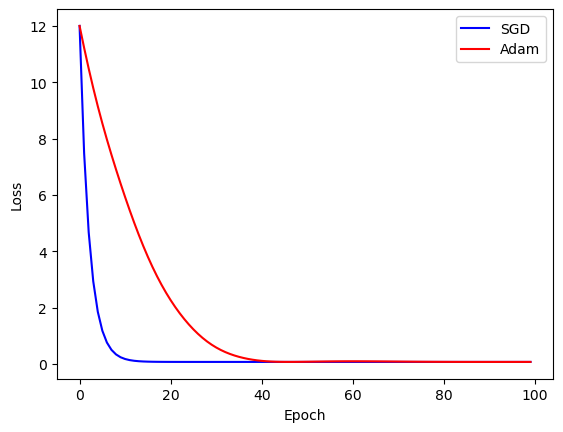

In [132]:
plt.plot(stored_loss, color = "blue", label = "SGD")
plt.plot(stored_loss_2, color = "red", label = "Adam")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

The Adam optimiser converged much more slowly compared to the SGD optimiser. This could be due to the simplicity of the problem (the loss function is strictly convex), so the SGD classifier can wander into the solution quite quickly. On the other hand, the Adam optimiser has momentum, meaning that it takes some time to settle on a solution.

____

# Problem 3 - Multi-Layer Perceptron on MNIST